In [352]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [353]:
#data = pd.read_csv('Data/weights_heights.csv', index_col='Index')
data = pd.read_csv('Data/advertising.csv')

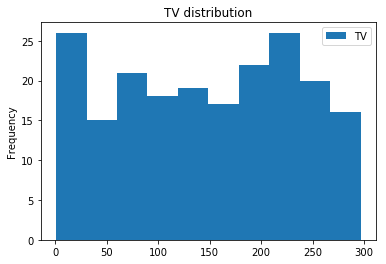

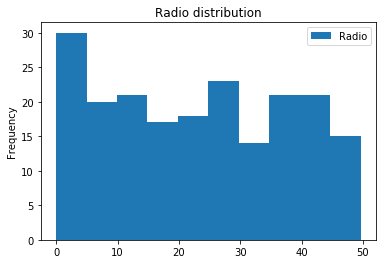

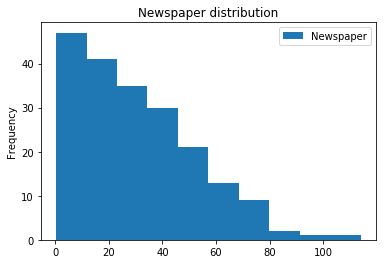

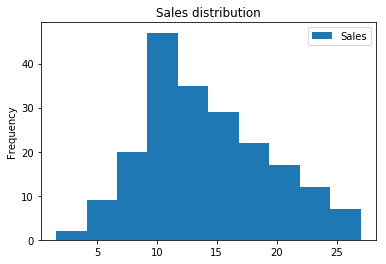

In [354]:
data.plot(y='TV', kind='hist', title='TV distribution')
data.plot(y='Radio', kind='hist', title='Radio distribution')
data.plot(y='Newspaper', kind='hist', title='Newspaper distribution')
data.plot(y='Sales', kind='hist', title='Sales distribution')
plt.show()

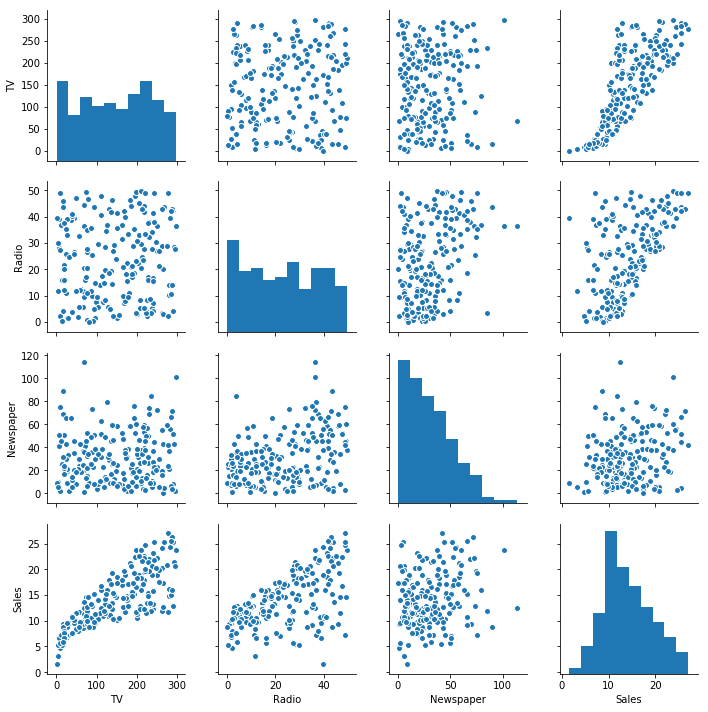

In [355]:
sns.pairplot(data)
plt.show()

In [356]:
def lsm(X, y):
    """
    Returns weights as a least-squares solution to 
    linear matrix equation Xw = y.
    Solves this equation by computing a vector w
    that minimizes ||y-Xw||**2.
    If X is square and of full rank,
    then w is the “exact” solution of the equation.
    """
    #X_t = X.transpose()
    #w = np.linalg.inv(X_t.dot(X)).dot(X_t).dot(y)
    w = np.linalg.lstsq(X,y)[0]
    return w
    

def a(w, X):
    """
    Returns a linear regression model prediction labels for objects in matrix X using weights w:
    y_pred = (X,w)
    """
    return np.dot(X,w)

In [357]:
def Q(w, X, y, error = 'mse'):
    if (error == 'mae'):
        return mae(y, a(w, X))
    return mse(y, a(w, X))
    
def mse(y, y_pred):
    """
    Returns a mean squared error between real and model prediction labels
    """
    y = np.array(y)
    y_pred = np.array(y_pred)
    mse = np.sum((y - y_pred)**2) / y.size
    return mse

def mae(y, y_pred):
    """
    Returns a mean absolute error between real and model prediction labels
    """
    y = np.array(y)
    y_pred = np.array(y_pred)
    mae = np.sum(abs(y - y_pred)) / y.size
    return mae

In [363]:
###GRADIENT
def grad(f,x,h=0.001):
    dim = x.size
    I = np.eye(dim)
    H = h * np.ones(dim)
    return np.array([(f(x + H * I_vec) - f(x - H * I_vec)) / (2.0 * (H @ I_vec)) for I_vec in I])

### STOP CONDITIONS
def stop(f,x_old,x_new,eps = 0.00001):
    stop1 = np.linalg.norm(x_new-x_old) <= eps
    stop1 = abs(f(x_new)-f(x_old)) <= eps
    stop2 = np.linalg.norm(grad(f,x_new), ord=x_new.size) <= eps
    return stop1 #and stop2 and stop3


### CHOOSING ALPHA
def alpha_split(f,x,step,b=1,l=0.5):
    alpha = b
    q = 0.1
    while (f(x + alpha * step) - f(x) >= 0):
    #while (f(x + alpha * h) - f(x) > q * alpha * grad(f,x).dot(h)):
        alpha *= l
    return alpha

### ACTUALLY THE GRADIENT METHOD
def gradient_method_classic(f,x0,h=0.001):
    """
    Gradient method, used to minimize function f numerically, 
    starting from the point x0 and computing gradiendt with o(h)
    Returns approximate minimum
    """
    #fout = open('output.txt', 'w')
    #fout.write('The initial point is ({x}, {y})\n\n'.format(x=x0[0], y=x0[1]))
    print('The initial point is ({x}, {y})\n\n'.format(x=x0[0], y=x0[1]))
    x_new = x0
    k = 0
    x = [x_new]
    while True:
        x_old = x_new    
        step = - grad(f,x_old,h)
        alpha = alpha_split(f,x_old,step)
        x_new = x_old + alpha * step
        x.append(x_new)
        #fout.write('{iter:>3}. alpha = {al:<17.15f},   x_{iter:<3} = ({x:>18.15f}, {y:>18.15f})\n'.format(iter=k, x=x_new[0], y=x_new[1], al=alpha))
        if (stop(f,x_old,x_new)):
            break
        break
    #print('Gradient method found approximate solution in {} iterations'.format(k))
    #fout.write('\nThe approximate solution of the problem is ({x:>10.7f}, {y:>10.7f})\n'.format(x=x_new[0], y=x_new[1]))
    #fout.write('The value of function in this point is {v:>10.7f}\n'.format(v=f(x_new)))
    #fout.close()
    return x_new, x

In [358]:
cut = 100
feature = 'TV'
label = 'Sales'
X = np.array(data[[feature]].values, dtype=float)[:cut]
y = np.array(data[[label]].values, dtype=float)[:cut]

#means, stds = X.mean(axis=0), X.std(axis=0)
#X = (X - means) / stds

n = X.shape[0]
m = X.shape[1]
X = np.hstack((X,np.ones((n,1))))

xsize = 2
x = np.linspace(min(data[feature]),max(data[feature]),xsize).reshape((xsize,1))
x_ones = np.hstack((x,np.ones(xsize).reshape((xsize,1))))

w:
 [[ 0.04906918]
 [ 7.24173379]] 

mse =  9.34064114569
mae =  2.34786986546


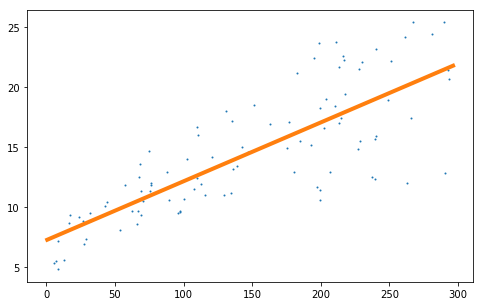

In [359]:
w = lsm(X,y)
print('w:\n',w,'\n')

print('mse = ', Q(w, X, y, 'mse'))
print('mae = ', Q(w, X, y, 'mae'))

plt.figure(figsize = (8,5))
plt.plot(data[feature][:cut], data[label][:cut], 'o', markersize = 1)
plt.plot(x, a(w, x_ones), '-', linewidth = 4)
#plt.plot(x, linear_prediction(x_ones, w_linear), '-', linewidth = 5)
plt.show()

The initial point is (0, 0)


w =  [ 0.10149228  0.00068965] 

mse =  9814.43669313
mae =  825.433024156


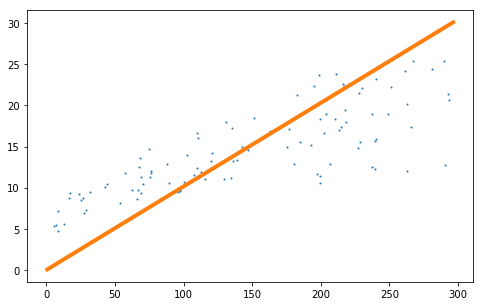

In [367]:
w0 = np.array([0,0])
w, w_path = gradient_method_classic(lambda w: Q(w, X, y), w0)
print('w = ',w,'\n')
plt.figure(figsize = (8,5))
w_path = np.array(w_path)
#plt.plot(w_path[:,0], w_path[:,1], 'o', markersize = 5)
#plt.show()

print('mse = ', Q(w, X, y, 'mse'))
print('mae = ', Q(w, X, y, 'mae'))

plt.figure(figsize = (8,5))
plt.plot(data[feature][:cut], data[label][:cut], 'o', markersize = 1)
plt.plot(x, a(w, x_ones), '-', linewidth = 4)
#plt.plot(x, linear_prediction(x_ones, w_linear), '-', linewidth = 5)
plt.show()

In [360]:
###GRADIENT
def grad(X,y,w):
    m = X.shape[0]
    grad = 2 * (X.transpose()).dot(X.dot(w).reshape((m,1)) - y) / y.size
    return grad

### STOP CONDITIONS
def stop(X,y,w_old,w_new,eps = 0.00001):
    diff1 = np.linalg.norm(w_new - w_old)
    #diff2 = abs(X.dot(w_old) - X.dot(w_new))
    #diff3 = np.linalg.norm(grad(X,y,w_new), ord=w_new.size)
    return diff1 <= eps #and stop2 and stop3


### CHOOSING ALPHA
def alpha_split(X,y,w,step,b=0.01,l=0.5):
    alpha = b
    while (Q(w, X, y) - Q(w + alpha * step, X, y) >= 0):
        alpha *= l
    return alpha

### ACTUALLY THE GRADIENT METHOD
def gradient_method(X,y,w0):
    """
    Gradient method, used to minimize function f numerically, 
    starting from the point x0 and computing gradiendt with o(h)
    Returns approximate minimum
    """
    #fout = open('output.txt', 'w')
    #fout.write('The initial point is ({x}, {y})\n\n'.format(x=x0[0], y=x0[1]))
    print('The initial point is ({}, {})\n\n'.format(*w0))
    w_new = w0
    w = [w_new]
    alpha = 0.001
    k = 0
    while True:
        w_old = w_new    
        print('w_old = ',w_old)
        step = - grad(X,y,w_old)
        print('step = ',step)
        alpha = alpha_split(X,y,w_old,step)
        print('alpha = ',alpha)
        w_new = w_old + alpha * step
        print('w_new = ',w_new)
        w.append(w_new)
        #fout.write('{iter:>3}. alpha = {al:<17.15f},   x_{iter:<3} = ({x:>18.15f}, {y:>18.15f})\n'.format(iter=k, x=x_new[0], y=x_new[1], al=alpha))
        if (stop(X,y,w_old,w_new)):
            break
        k += 1
        if k>10:
            break
    #print('Gradient method found approximate solution in {} iterations'.format(k))
    #fout.write('\nThe approximate solution of the problem is ({x:>10.7f}, {y:>10.7f})\n'.format(x=x_new[0], y=x_new[1]))
    #fout.write('The value of function in this point is {v:>10.7f}\n'.format(v=f(x_new)))
    #fout.close()
    return w_new, w

The initial point is ([0], [0])


w_old =  [[0]
 [0]]
step =  [[ 4940.9286]
 [   28.926 ]]
alpha =  0.01
w_new =  [[ 49.409286]
 [  0.28926 ]]
w_old =  [[ 49.409286]
 [  0.28926 ]]
step =  [[-2824086.03197773]
 [  -14514.28766838]]
alpha =  0.01
w_new =  [[-28191.45103378]
 [  -144.85361668]]
w_old =  [[-28191.45103378]
 [  -144.85361668]]
step =  [[  1.61415661e+09]
 [  8.29790842e+06]]
alpha =  0.01
w_new =  [[ 16113374.64093408]
 [    82834.23054337]]
w_old =  [[ 16113374.64093408]
 [    82834.23054337]]
step =  [[ -9.22599930e+11]
 [ -4.74281520e+09]]
alpha =  0.01
w_new =  [[ -9.20988593e+09]
 [ -4.73453177e+07]]
w_old =  [[ -9.20988593e+09]
 [ -4.73453177e+07]]
step =  [[  5.27328406e+14]
 [  2.71084042e+12]]
alpha =  0.01
w_new =  [[  5.26407417e+12]
 [  2.70610588e+10]]
w_old =  [[  5.26407417e+12]
 [  2.70610588e+10]]
step =  [[ -3.01403933e+17]
 [ -1.54942907e+15]]
alpha =  0.01
w_new =  [[ -3.00877525e+15]
 [ -1.54672297e+13]]
w_old =  [[ -3.00877525e+15]
 [ -1.54672297e+13]

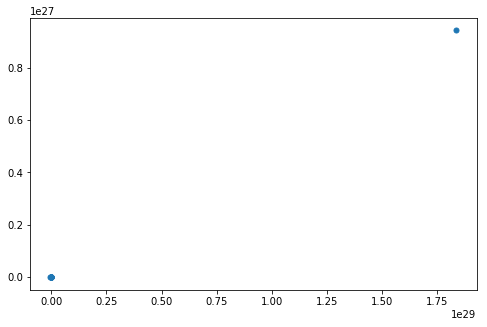

mse =  9.64418160802e+62
mae =  2.70114685841e+31


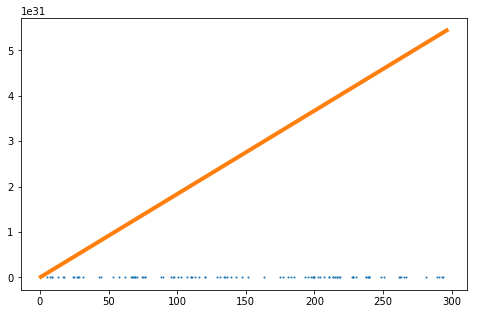

In [361]:
w0 = np.array([[0],[0]])
w, w_path = gradient_method(X, y, w0)
print('w:\n',w,'\n')
plt.figure(figsize = (8,5))
w_path = np.array(w_path)
plt.plot(w_path[:,0], w_path[:,1], 'o', markersize = 5)
plt.show()

print('mse = ', Q(w, X, y, 'mse'))
print('mae = ', Q(w, X, y, 'mae'))

plt.figure(figsize = (8,5))
plt.plot(data[feature][:cut], data[label][:cut], 'o', markersize = 1)
plt.plot(x, a(w, x_ones), '-', linewidth = 4)
#plt.plot(x, linear_prediction(x_ones, w_linear), '-', linewidth = 5)
plt.show()